**Author:** Prof. AJ Smit

Department of Biodiversity and Conservation Biology

University of the Western Cape

# PCA of World Health Organization data on progress towards attaining SDGs

## Load packages

In [1]:
library(tidyverse)
library(vegan)
library(missMDA) # to impute missing values
library(ggcorrplot) # for the correlations

── Attaching packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: permute

Loading required package: lattice

This is vegan 2.5-7



## Define and load the data

SDG 1.a
[Domestic general government health expenditure (GGHE-D) as percentage of general government expenditure (GGE) (%)](https://www.who.int/data/gho/data/indicators/indicator-details/GHO/domestic-general-government-health-expenditure-(gghe-d)-as-percentage-of-general-government-expenditure-(gge))

In [2]:
SDG1.a <- read.csv("/Users/ajsmit/Dropbox/R/workshops/Quantitative_Ecology/exercises/WHO/WHO_SDG1.a_domestic_health_expenditure.csv") %>%
  filter(Period == 2016) %>%
  select(Indicator, ParentLocation, Location, FactValueNumeric) %>%
  mutate(SDG = "SDG1.a")

SDG 3.1 [Maternal mortality ratio (per 100 000 live births)](https://www.who.int/data/gho/data/indicators/indicator-details/GHO/maternal-mortality-ratio-(per-100-000-live-births))

In [3]:
SDG3.1_1 <- read.csv("/Users/ajsmit/Dropbox/R/workshops/Quantitative_Ecology/exercises/WHO/WHO_SDG3.1_maternal_mort.csv") %>%
  filter(Period == 2016,
         Indicator == "Maternal mortality ratio (per 100 000 live births)") %>%
  select(Indicator, ParentLocation, Location, FactValueNumeric) %>%
  mutate(SDG = "SDG3.1_1")

SDG 3.1 [Births attended by skilled health personnel (%)](https://www.who.int/data/gho/data/indicators/indicator-details/GHO/births-attended-by-skilled-health-personnel-(-))

In [4]:
SDG3.1_2 <- read.csv("/Users/ajsmit/Dropbox/R/workshops/Quantitative_Ecology/exercises/WHO/WHO_SDG3.1_skilled_births.csv") %>%
  filter(Period == 2016) %>%
  select(Indicator, ParentLocation, Location, FactValueNumeric) %>%
  mutate(SDG = "SDG3.1_2")

SDG 3.2 [Number of neonatal deaths (Child mortality)](https://www.who.int/data/gho/data/indicators/indicator-details/GHO/number-of-neonatal-deaths)

In [5]:
SDG3.2_1 <- read.csv("/Users/ajsmit/Dropbox/R/workshops/Quantitative_Ecology/exercises/WHO/WHO_SDG3.2_neonatal_deaths.csv") %>%
  filter(Period == 2016,
         Dim1 == "Both sexes") %>%
  select(Indicator, ParentLocation, Location, FactValueNumeric) %>%
  mutate(SDG = "SDG3.2_1")

SDG 3.2 [Number of under-five deaths (Child mortality)](https://www.who.int/data/gho/data/indicators/indicator-details/GHO/number-of-under-five-deaths)

In [6]:
SDG3.2_2 <- read.csv("/Users/ajsmit/Dropbox/R/workshops/Quantitative_Ecology/exercises/WHO/WHO_SDG3.2_under_5_deaths.csv") %>%
  filter(Period == 2016,
         Dim1 == "Both sexes") %>%
  select(Indicator, ParentLocation, Location, FactValueNumeric) %>%
  mutate(SDG = "SDG3.2_2")

SDG 3.2 [Number of infant deaths (Child mortality)](https://www.who.int/data/gho/data/indicators/indicator-details/GHO/number-of-infant-deaths)

In [7]:
SDG3.2_3 <- read.csv("/Users/ajsmit/Dropbox/R/workshops/Quantitative_Ecology/exercises/WHO/WHO_SDG3.2_infant_deaths.csv") %>%
  filter(Period == 2016,
         Dim1 == "Both sexes") %>%
  select(Indicator, ParentLocation, Location, FactValueNumeric) %>%
  mutate(SDG = "SDG3.2_3")

SDG 3.3 [New HIV infections (per 1000 uninfected population)](https://www.who.int/data/gho/data/indicators/indicator-details/GHO/new-hiv-infections-(per-1000-uninfected-population))

In [8]:
SDG3.3_1 <- read.csv("/Users/ajsmit/Dropbox/R/workshops/Quantitative_Ecology/exercises/WHO/WHO_SDG3.3_new_HIV_infections.csv") %>%
  filter(Period == 2015,
         Dim1 == "Both sexes") %>%
  select(Indicator, ParentLocation, Location, FactValueNumeric) %>%
  mutate(SDG = "SDG3.3_1")

SDG 3.3 [Incidence of tuberculosis (per 100 000 population per year)](https://www.who.int/data/gho/data/indicators/indicator-details/GHO/incidence-of-tuberculosis-(per-100-000-population-per-year))

In [9]:
SDG3.3_2 <- read.csv("/Users/ajsmit/Dropbox/R/workshops/Quantitative_Ecology/exercises/WHO/WHO_SDG3.3_TB.csv") %>%
  filter(Period == 2016) %>%
  select(Indicator, ParentLocation, Location, FactValueNumeric) %>%
  mutate(SDG = "SDG3.3_2")

SDG 3.3 [Malaria incidence (per 1 000 population at risk)](https://www.who.int/data/gho/data/indicators/indicator-details/GHO/malaria-incidence-(per-1-000-population-at-risk))

In [10]:
SDG3.3_3 <- read.csv("/Users/ajsmit/Dropbox/R/workshops/Quantitative_Ecology/exercises/WHO/WHO_SDG3.3_malaria.csv") %>%
  filter(Period == 2016) %>%
  select(Indicator, ParentLocation, Location, FactValueNumeric) %>%
  mutate(SDG = "SDG3.3_3")

SDG 3.3 [Hepatitis B surface antigen (HBsAg) prevalence among children under 5 years](https://www.who.int/data/gho/data/indicators/indicator-details/GHO/hepatitis-b-surface-antigen-(hbsag)-prevalence-among-children-under-5-years)

In [11]:
SDG3.3_4 <- read.csv("/Users/ajsmit/Dropbox/R/workshops/Quantitative_Ecology/exercises/WHO/WHO_SDG3.3_hepatitis_B.csv") %>%
  filter(Period == 2015) %>%
  select(Indicator, ParentLocation, Location, FactValueNumeric) %>%
  mutate(SDG = "SDG3.3_4")

SDG 3.3 [Reported number of people requiring interventions against NTDs](https://www.who.int/data/gho/data/indicators/indicator-details/GHO/reported-number-of-people-requiring-interventions-against-ntds)

In [12]:
SDG3.3_5 <- read.csv("/Users/ajsmit/Dropbox/R/workshops/Quantitative_Ecology/exercises/WHO/WHO_SDG3.3_NCD_interventions.csv") %>%
  filter(Period == 2016) %>%
  select(Indicator, ParentLocation, Location, FactValueNumeric) %>%
  mutate(SDG = "SDG3.3_5")

SDG 3.4 [Adult mortality rate (probability of dying between 15 and 60 years per 1000 population)](https://www.who.int/data/gho/data/indicators/indicator-details/GHO/adult-mortality-rate-(probability-of-dying-between-15-and-60-years-per-1000-population))

In [13]:
SDG3.4_1 <- read.csv("/Users/ajsmit/Dropbox/R/workshops/Quantitative_Ecology/exercises/WHO/WHO_SDG3.4_adult_death_prob.csv") %>%
  filter(Period == 2016,
         Dim1 == "Both sexes") %>%
  select(Indicator, ParentLocation, Location, FactValueNumeric) %>%
  mutate(SDG = "SDG3.4_1")

SDG 3.4 [Number of deaths attributed to non-communicable diseases, by type of disease and sex](https://www.who.int/data/gho/data/indicators/indicator-details/GHO/number-of-deaths-attributed-to-non-communicable-diseases-by-type-of-disease-and-sex)

In [14]:
SDG3.4_2 <- read.csv("/Users/ajsmit/Dropbox/R/workshops/Quantitative_Ecology/exercises/WHO/WHO_SDG3.4_NCD_by_cause.csv") %>%
  filter(Period == 2016,
         Dim1 == "Both sexes",
         Dim2 == "Diabetes mellitus") %>%
  mutate(Indicator = Dim2) %>%
  select(Indicator, ParentLocation, Location, FactValueNumeric) %>%
  mutate(SDG = "SDG3.4_2")

SDG3.4_3 <- read.csv("/Users/ajsmit/Dropbox/R/workshops/Quantitative_Ecology/exercises/WHO/WHO_SDG3.4_NCD_by_cause.csv") %>%
  filter(Period == 2016,
         Dim1 == "Both sexes",
         Dim2 == "Cardiovascular diseases") %>%
  mutate(Indicator = Dim2) %>%
  select(Indicator, ParentLocation, Location, FactValueNumeric) %>%
  mutate(SDG = "SDG3.4_3")

SDG3.4_4 <- read.csv("/Users/ajsmit/Dropbox/R/workshops/Quantitative_Ecology/exercises/WHO/WHO_SDG3.4_NCD_by_cause.csv") %>%
  filter(Period == 2016,
         Dim1 == "Both sexes",
         Dim2 == "Respiratory diseases") %>%
  mutate(Indicator = Dim2) %>%
  select(Indicator, ParentLocation, Location, FactValueNumeric) %>%
  mutate(SDG = "SDG3.4_4")

SDG 3.4 [Crude suicide rates (per 100 000 population) (SDG 3.4.2)](https://www.who.int/data/gho/data/indicators/indicator-details/GHO/crude-suicide-rates-(per-100-000-population))

In [15]:
SDG3.4_5 <- read.csv("/Users/ajsmit/Dropbox/R/workshops/Quantitative_Ecology/exercises/WHO/WHO_SDG3.4_suicides.csv") %>%
  filter(Period == 2016,
         Dim1 == "Both sexes") %>%
  select(Indicator, ParentLocation, Location, FactValueNumeric) %>%
  mutate(SDG = "SDG3.4_5")

SDG3.4 [Total NCD Deaths (in thousands)](https://www.who.int/data/gho/data/indicators/indicator-details/GHO/gho-ghe-ncd-deaths-in-thousands)

In [16]:
SDG3.4_6 <- read.csv("/Users/ajsmit/Dropbox/R/workshops/Quantitative_Ecology/exercises/WHO/WHO_SDG3.4_NCD_data_total.csv") %>%
  filter(Period == 2016,
         Dim1 == "Both sexes") %>%
  select(Indicator, ParentLocation, Location, FactValueNumeric) %>%
  mutate(SDG = "SDG3.4_6")

SDG 3.5 [Alcohol, total per capita (15+) consumption (in litres of pure alcohol) (SDG Indicator 3.5.2)](https://www.who.int/data/gho/data/indicators/indicator-details/GHO/total-(recorded-unrecorded)-alcohol-per-capita-(15-)-consumption)

In [17]:
SDG3.5 <- read.csv("/Users/ajsmit/Dropbox/R/workshops/Quantitative_Ecology/exercises/WHO/WHO_SDG3.5_alcohol_consumption.csv") %>%
  filter(Period == 2015,
         Dim1 == "Both sexes") %>%
  select(Indicator, ParentLocation, Location, FactValueNumeric) %>%
  mutate(SDG = "SDG3.5")

SDG 3.6 [Estimated road traffic death rate (per 100 000 population)](https://www.who.int/data/gho/data/indicators/indicator-details/GHO/estimated-road-traffic-death-rate-(per-100-000-population))

In [18]:
SDG3.6 <- read.csv("/Users/ajsmit/Dropbox/R/workshops/Quantitative_Ecology/exercises/WHO/WHO_SDG3.6_traffic_deaths_prop.csv") %>%
  filter(Period == 2016,
         Dim1 == "Both sexes") %>%
  select(Indicator, ParentLocation, Location, FactValueNumeric) %>%
  mutate(SDG = "SDG3.6")

SDG 3.7 [Adolescent birth rate (per 1000 women aged 15-19 years)](https://www.who.int/data/gho/data/indicators/indicator-details/GHO/adolescent-birth-rate-(per-1000-women-aged-15-19-years))

In [19]:
SDG3.7 <- read.csv("/Users/ajsmit/Dropbox/R/workshops/Quantitative_Ecology/exercises/WHO/WHO_SDG3.7_adolescent_births.csv") %>%
  filter(Period == 2016) %>%
  select(Indicator, ParentLocation, Location, FactValueNumeric) %>%
  mutate(SDG = "SDG3.7")

SDG 3.8 [UHC Index of service coverage (SCI)](https://www.who.int/data/gho/data/indicators/indicator-details/GHO/uhc-index-of-service-coverage)

In [20]:
SDG3.8_1 <- read.csv("/Users/ajsmit/Dropbox/R/workshops/Quantitative_Ecology/exercises/WHO/WHO_SDG3.8_UHC_data_availability.csv") %>%
  filter(Period == "2013-2017") %>%
  select(Indicator, ParentLocation, Location, FactValueNumeric) %>%
  mutate(SDG = "SDG3.8_1")

SDG 3.8 [Data availability for UHC index of essential service coverage (%)](https://www.who.int/data/gho/data/indicators/indicator-details/GHO/data-availability-for-uhc-index-of-essential-service-coverage-(-))

In [21]:
SDG3.8_2 <- read.csv("/Users/ajsmit/Dropbox/R/workshops/Quantitative_Ecology/exercises/WHO/WHO_SDG3.8_UHC_index_of_service_coverage.csv") %>%
  filter(Period == 2017) %>%
  select(Indicator, ParentLocation, Location, FactValueNumeric) %>%
  mutate(SDG = "SDG3.8_2")

SDG 3.8 [Population with household expenditures on health greater than 10% of total household expenditure or income (SDG 3.8.2) (%)](https://www.who.int/data/gho/data/indicators/indicator-details/GHO/population-with-household-expenditures-on-health-greater-than-10-of-total-household-expenditure-or-income-(sdg-3-8-2)-(-))

Not used for some reason.

In [22]:
# SDG3.8_3 <- read.csv("/Users/ajsmit/Dropbox/R/workshops/Quantitative_Ecology/exercises/WHO/WHO_SDG3.8_UHC_percent_of_expenditure_1.csv") %>%
#   filter(Period == 2016) %>%
#   select(Indicator, ParentLocation, Location, FactValueNumeric)

SDG 3.8 [Population with household expenditures on health greater than 25% of total household expenditure or income ( SDG indicator 3.8.2) (%)](https://www.who.int/data/gho/data/indicators/indicator-details/GHO/population-with-household-expenditures-on-health-greater-than-25-of-total-household-expenditure-or-income-(-sdg-indicator-3-8-2)-(-))

Not used for some reason.

In [23]:
# SDG3.8_4 <- read.csv("/Users/ajsmit/Dropbox/R/workshops/Quantitative_Ecology/exercises/WHO/WHO_SDG3.8_UHC_percent_of_expenditure_2.csv") %>%
#   filter(Period == 2016) %>%
#   select(Indicator, ParentLocation, Location, FactValueNumeric)

SDG 3.9 [Poison control and unintentional poisoning](https://www.who.int/data/gho/data/themes/topics/indicator-groups/poison-control-and-unintentional-poisoning)

In [24]:
SDG3.9_1 <- read.csv("/Users/ajsmit/Dropbox/R/workshops/Quantitative_Ecology/exercises/WHO/WHO_SDG3.9_unintentional_poisoning_prop.csv") %>%
  filter(Period == 2016,
         Dim1 == "Both sexes") %>%
  select(Indicator, ParentLocation, Location, FactValueNumeric) %>%
  mutate(SDG = "SDG3.9_1")

SDG 3.9 [Indicator 3.9.1: Mortality rate attributed to household and ambient air pollution (per 100 000 population)](https://www.who.int/data/gho/data/indicators/indicator-details/GHO/ambient-and-household-air-pollution-attributable-death-rate-(per-100-000-population))

Data in a format that's not easy to use.

In [25]:
# SDG3.9_2 <- read.csv("/Users/ajsmit/Dropbox/R/workshops/Quantitative_Ecology/exercises/WHO/WHO_SDG3.9_ambient_air_pollution.csv") %>%
#   filter(Period == 2016,
#          Dim1 == "Both sexes") %>%
#   select(Indicator, ParentLocation, Location, FactValueNumeric)

SDG 3.9 [Mortality rate attributed to exposure to unsafe WASH services (per 100 000 population) (SDG 3.9.2)](https://www.who.int/data/gho/data/indicators/indicator-details/GHO/mortality-rate-attributed-to-exposure-to-unsafe-wash-services-(per-100-000-population)-(sdg-3-9-2))

In [26]:
SDG3.9_3 <- read.csv("/Users/ajsmit/Dropbox/R/workshops/Quantitative_Ecology/exercises/WHO/WHO_SDG3.9_WASH_mortalities.csv") %>%
  filter(Period == 2016,
         Dim1 == "Both sexes") %>%
  select(Indicator, ParentLocation, Location, FactValueNumeric) %>%
  mutate(SDG = "SDG3.9_3")

SDG 16.1 [Estimates of rate of homicides (per 100 000 population)](https://www.who.int/data/gho/data/indicators/indicator-details/GHO/estimates-of-rates-of-homicides-per-100-000-population)

In [27]:
SDG16.1 <- read.csv("/Users/ajsmit/Dropbox/R/workshops/Quantitative_Ecology/exercises/WHO/WHO_SDG16.1_homicides.csv") %>%
  filter(Period == 2016,
         Dim1 == "Both sexes") %>%
  select(Indicator, ParentLocation, Location, FactValueNumeric) %>%
  mutate(SDG = "SDG16.1")

SDG 3.a [Prevalence of current tobacco use among persons aged 15 years and older (age-standardized rate)](https://www.who.int/data/gho/data/indicators/indicator-details/GHO/age-standardized-prevalence-of-current-tobacco-smoking-among-persons-aged-15-years-and-older)

In [28]:
SDG3.a <- read.csv("/Users/ajsmit/Dropbox/R/workshops/Quantitative_Ecology/exercises/WHO/WHO_SDG3.a_tobacco_control.csv") %>%
  filter(Period == 2016,
         Dim1 == "Both sexes") %>%
  select(Indicator, ParentLocation, Location, FactValueNumeric) %>%
  mutate(SDG = "SDG3.a")

SDG 3.b [Total net official development assistance to medical research and basic health sectors per capita (US$), by recipient country](https://www.who.int/data/gho/data/indicators/indicator-details/GHO/total-net-official-development-assistance-to-medical-research-and-basic-health-sectors-per-capita)

In [29]:
SDG3.b_1 <- read.csv("/Users/ajsmit/Dropbox/R/workshops/Quantitative_Ecology/exercises/WHO/WHO_SDG3.b_dev_assistence_for_med_research.csv") %>%
  filter(Period == 2016) %>%
  select(Indicator, ParentLocation, Location, FactValueNumeric) %>%
  mutate(SDG = "SDG3.b_1")

SDG 3.b [Measles-containing-vaccine second-dose (MCV2) immunization coverage by the nationally recommended age (%)](https://www.who.int/data/gho/data/indicators/indicator-details/GHO/measles-containing-vaccine-second-dose-(mcv2)-immunization-coverage-by-the-nationally-recommended-age-(-))

In [30]:
SDG3.b_2 <- read.csv("/Users/ajsmit/Dropbox/R/workshops/Quantitative_Ecology/exercises/WHO/WHO_SDG3.b_measles_vaccine.csv") %>%
  filter(Period == 2016) %>%
  select(Indicator, ParentLocation, Location, FactValueNumeric) %>%
  mutate(SDG = "SDG3.b_2")

SDG 3.b [Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)](https://www.who.int/data/gho/data/indicators/indicator-details/GHO/diphtheria-tetanus-toxoid-and-pertussis-(dtp3)-immunization-coverage-among-1-year-olds-(-))

In [31]:
SDG3.b_3 <- read.csv("/Users/ajsmit/Dropbox/R/workshops/Quantitative_Ecology/exercises/WHO/WHO_SDG3.b_diphtheria_vaccine.csv") %>%
  filter(Period == 2016) %>%
  select(Indicator, ParentLocation, Location, FactValueNumeric) %>%
  mutate(SDG = "SDG3.b_3")

SDG 3.b [Pneumococcal conjugate vaccines (PCV3) immunization coverage among 1-year-olds (%)](https://www.who.int/data/gho/data/indicators/indicator-details/GHO/pneumoccocal-conjugate-vaccines-(pcv3)-immunization-coverage-among-1-year-olds-(-))

In [32]:
SDG3.b_4 <- read.csv("/Users/ajsmit/Dropbox/R/workshops/Quantitative_Ecology/exercises/WHO/WHO_SDG3.b_pneumococcal_vaccine.csv") %>%
  filter(Period == 2016) %>%
  select(Indicator, ParentLocation, Location, FactValueNumeric) %>%
  mutate(SDG = "SDG3.b_4")

SDG 3.b [Girls aged 15 years old that received the recommended doses of HPV vaccine](https://www.who.int/data/gho/data/indicators/indicator-details/GHO/girls-aged-15-years-old-that-received-the-recommended-doses-of-hpv-vaccine)

In [33]:
SDG3.b_5 <- read.csv("/Users/ajsmit/Dropbox/R/workshops/Quantitative_Ecology/exercises/WHO/WHO_SDG3.b_HPV_vaccine.csv") %>%
  filter(Period == 2016) %>%
  select(Indicator, ParentLocation, Location, FactValueNumeric) %>%
  mutate(SDG = "SDG3.b_5")

SDG 3.b [Proportion of health facilities with a core set of relevant essential medicines available and affordable on a sustainable basis](https://www.who.int/data/gho/data/indicators/indicator-details/GHO/proportion-of-health-facilities-with-a-core-set-of-relevant-essential-medicines-available-and-affordable-on-a-sustainable-basis)

Full data not available

SDG 3.c [SDG Target 3.c | Health workforce: Substantially increase health financing and the recruitment, development, training and retention of the health workforce in developing countries, especially in least developed countries and small island developing States](https://www.who.int/data/gho/data/themes/topics/indicator-groups/indicator-group-details/GHO/sdg-target-3.c-health-workforce)

In [34]:
SDG3.c_1 <- read.csv("/Users/ajsmit/Dropbox/R/workshops/Quantitative_Ecology/exercises/WHO/WHO_SDG3.c_health_workforce.csv")  %>%
  filter(Period == 2016,
         Indicator == "Medical doctors (per 10,000)") %>%
  select(Indicator, ParentLocation, Location, FactValueNumeric) %>%
  mutate(SDG = "SDG3.c_1")

SDG3.c_2 <- read.csv("/Users/ajsmit/Dropbox/R/workshops/Quantitative_Ecology/exercises/WHO/WHO_SDG3.c_health_workforce.csv")  %>%
  filter(Period == 2016,
         Indicator == "Nursing and midwifery personnel (per 10,000)") %>%
  select(Indicator, ParentLocation, Location, FactValueNumeric) %>%
  mutate(SDG = "SDG3.c_2")

SDG3.c_3 <- read.csv("/Users/ajsmit/Dropbox/R/workshops/Quantitative_Ecology/exercises/WHO/WHO_SDG3.c_health_workforce.csv")  %>%
  filter(Period == 2016,
         Indicator == "Dentists (per 10,000)") %>%
  select(Indicator, ParentLocation, Location, FactValueNumeric) %>%
  mutate(SDG = "SDG3.c_3")

SDG3.c_4 <- read.csv("/Users/ajsmit/Dropbox/R/workshops/Quantitative_Ecology/exercises/WHO/WHO_SDG3.c_health_workforce.csv")  %>%
  filter(Period == 2016,
         Indicator == "Pharmacists  (per 10,000)") %>%
  select(Indicator, ParentLocation, Location, FactValueNumeric) %>%
  mutate(SDG = "SDG3.c_4")

SDG 3.d [SDG Target 3.d | National and global health risks: Strengthen the capacity of all countries, in particular developing countries, for early warning, risk reduction and management of national and global health risks](https://www.who.int/data/gho/data/themes/topics/indicator-groups/indicator-group-details/GHO/sdg-target-3.d-national-and-global-health-risks)

Data not available

SDG 3.d [Average of 13 International Health Regulations core capacity scores, SPAR version](https://www.who.int/data/gho/data/indicators/indicator-details/GHO/-average-of-13-international-health-regulations-core-capacity-scores-spar-version)

In [35]:
SDG3.d_1 <- read.csv("/Users/ajsmit/Dropbox/R/workshops/Quantitative_Ecology/exercises/WHO/WHO_SDG3.d_health_risks.csv")  %>%
  filter(Period == 2016) %>%
  select(Indicator, ParentLocation, Location, FactValueNumeric) %>%
  mutate(SDG = "SDG3.d_1")

Other [Life expectancy at birth (years)](https://www.who.int/data/gho/data/indicators/indicator-details/GHO/life-expectancy-at-birth-(years))

In [36]:
other_1 <- read.csv("/Users/ajsmit/Dropbox/R/workshops/Quantitative_Ecology/exercises/WHO/WHO_Other_life_expectancy.csv") %>%
  filter(Period == 2015,
         Dim1 == "Both sexes",
         Indicator == "Life expectancy at birth (years)") %>%
  select(Indicator, ParentLocation, Location, FactValueNumeric) %>%
  mutate(SDG = "other_1")

Other [Life expectancy at age 60 (years)](https://www.who.int/data/gho/data/indicators/indicator-details/GHO/life-expectancy-at-age-60-(years))

In [37]:
other_2 <- read.csv("/Users/ajsmit/Dropbox/R/workshops/Quantitative_Ecology/exercises/WHO/WHO_Other_life_expectancy.csv") %>%
  filter(Period == 2015,
         Dim1 == "Both sexes",
         Indicator == "Life expectancy at age 60 (years)") %>%
  select(Indicator, ParentLocation, Location, FactValueNumeric) %>%
  mutate(SDG = "other_2")

## rbind the data

In [38]:
health <- do.call("rbind", lapply(ls(),get))
head(health)

,Indicator,ParentLocation,Location,FactValueNumeric,SDG
,<chr>,<chr>,<chr>,<dbl>,<chr>
1,Life expectancy at birth (years),Africa,Lesotho,47.67,other_1
2,Life expectancy at birth (years),Africa,Central African Republic,50.53,other_1
3,Life expectancy at birth (years),Africa,Eswatini,54.05,other_1
4,Life expectancy at birth (years),Eastern Mediterranean,Somalia,54.57,other_1
5,Life expectancy at birth (years),Africa,Mozambique,55.95,other_1
6,Life expectancy at birth (years),Africa,Sierra Leone,56.94,other_1


## Create list of SDGs used

In [39]:
unique(health[, c(5, 1)])
# write_csv(unique(health[, c(5, 1)]), file = "/Users/ajsmit/Dropbox/R/workshops/Quantitative_Ecology/exercises/WHO/SDG_description.csv")

,SDG,Indicator
,<chr>,<chr>
1,other_1,Life expectancy at birth (years)
184,other_2,Life expectancy at age 60 (years)
367,SDG1.a,Domestic general government health expenditure (GGHE-D) as percentage of general government expenditure (GGE) (%)
554,SDG16.1,Estimates of rates of homicides per 100 000 population
737,SDG3.1_1,Maternal mortality ratio (per 100 000 live births)
920,SDG3.1_2,Births attended by skilled health personnel (%)
1005,SDG3.2_1,Number of neonatal deaths
1199,SDG3.2_2,Number of under-five deaths
1393,SDG3.2_3,Number of infant deaths


## Pivot wider

In [40]:
health_wide <- health %>%
  arrange(Location) %>%
  select(-Indicator) %>%
  pivot_wider(names_from = SDG, values_from = FactValueNumeric) %>%
  as_tibble()

## Add world population data

In [41]:
popl <- read_csv("/Users/ajsmit/Dropbox/R/workshops/Quantitative_Ecology/exercises/WHO/WHO_population.csv") %>%
  filter(Year == 2016) %>%
  rename(popl_size = `Population (in thousands) total`,
         Location = Country) %>%
  select(Location, popl_size) %>%
  mutate(popl_size = as.numeric(gsub("[[:space:]]", "", popl_size)) * 1000)

health_wide <- health_wide %>%
  left_join(popl)


── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  Country = col_character(),
  Year = col_character(),
  `Population (in thousands) total` = col_character(),
  `Population proportion under 15 (%)` = col_double(),
  `Population proportion over 60 (%)` = col_double(),
  `Population median age (years)` = col_double(),
  `Population living in urban areas (%)` = col_double(),
  `Population living on <$1 (PPP int. $) a day (%)` = col_character()
)


Joining, by = "Location"



## Express some variables to unit of population size

In [42]:
health_wide <- health_wide %>%
  mutate(SDG3.4_4 = SDG3.4_4 / popl_size * 100000,
         SDG3.4_3 = SDG3.4_3 / popl_size * 100000,
         SDG3.4_2 = SDG3.4_2 / popl_size * 100000,
         SDG3.4_6 = SDG3.4_6 / 100,
         SDG3.2_2 = SDG3.2_2 / popl_size * 100000,
         SDG3.2_3 = SDG3.2_3 / popl_size * 100000,
         SDG3.2_1 = SDG3.2_1 / popl_size * 100000)

## Histograms of missing values, and correlations

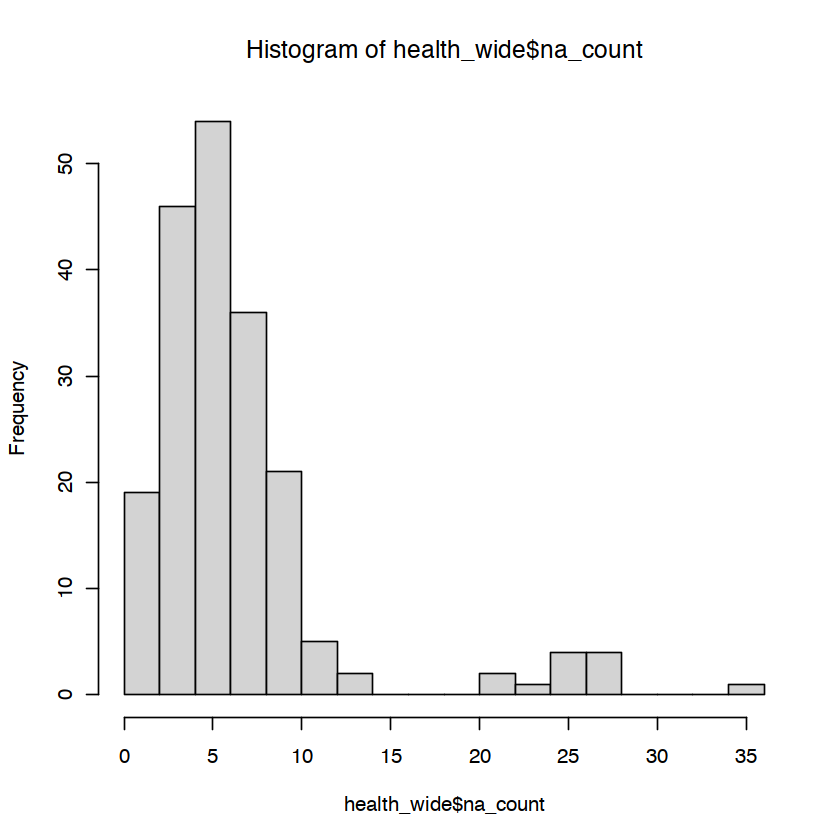

In [43]:
# calculate histograms
health_wide$na_count <- apply(health_wide[, 3:(ncol(health_wide) - 1)], 1, function(x) sum(is.na(x)))
hist(health_wide$na_count, breaks = 14, plot = TRUE)

In [44]:
# remove rows where there are more than 10 NAs
health_wide <- health_wide %>%
  filter(na_count <= 10) %>%
  select(-na_count)

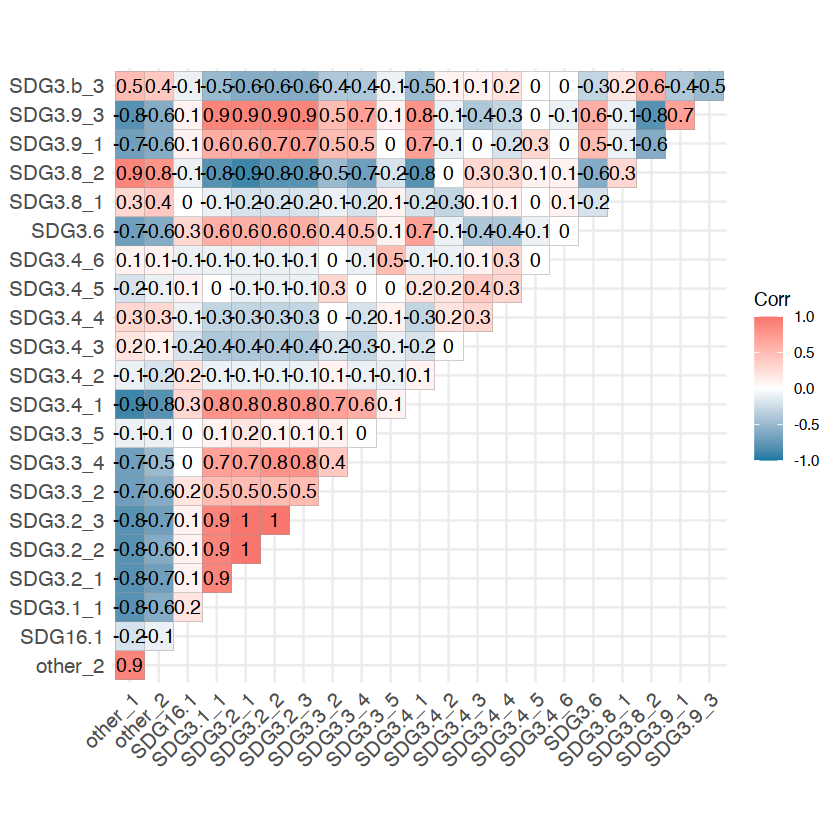

In [45]:
# calculate pairwise correlations
corr <- round(cor(health_wide[, 3:(ncol(health_wide) - 1)]), 1)

# visualization of the correlation matrix
ggcorrplot(corr, type = 'upper', outline.col = "grey60",
           colors = c("#1679a1", "white", "#f8766d"),
           lab = TRUE)

## Impute remaining NAs

There are still many remaining NAs, and I impute them with the `imputePCA()` method in the **missMDA** package (see Dray and Josse, 2015).

In [46]:
health_wide_complete <- imputePCA(health_wide[, 3:(ncol(health_wide) - 1)])$completeObs

## Scale and center the data and do the PCA

In [47]:
health_wide_complete_std <- decostand(health_wide_complete, method = "standardize")
health_pca <- rda(health_wide_complete_std)
health_pca
# summary(health_pca)

Call: rda(X = health_wide_complete_std)

              Inertia Rank
Total              38     
Unconstrained      38   38
Inertia is variance 

Eigenvalues for unconstrained axes:
   PC1    PC2    PC3    PC4    PC5    PC6    PC7    PC8 
17.499  3.220  2.049  1.732  1.654  1.364  1.047  0.894 
(Showing 8 of 38 unconstrained eigenvalues)


## Graphical displays

Make figure using the **vegan** `biplot.rda()` function:

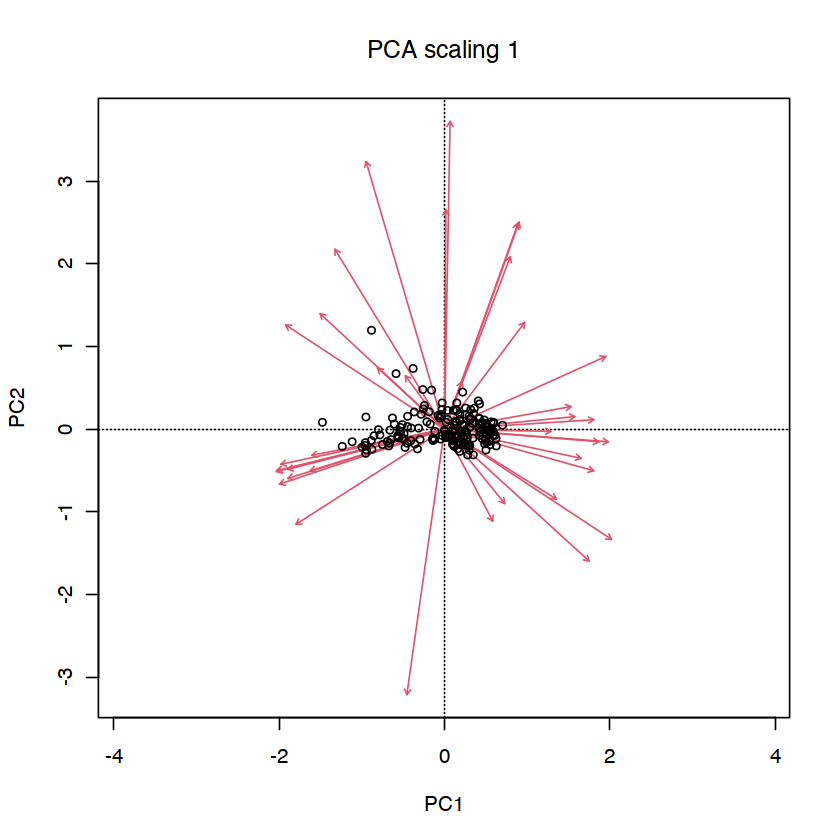

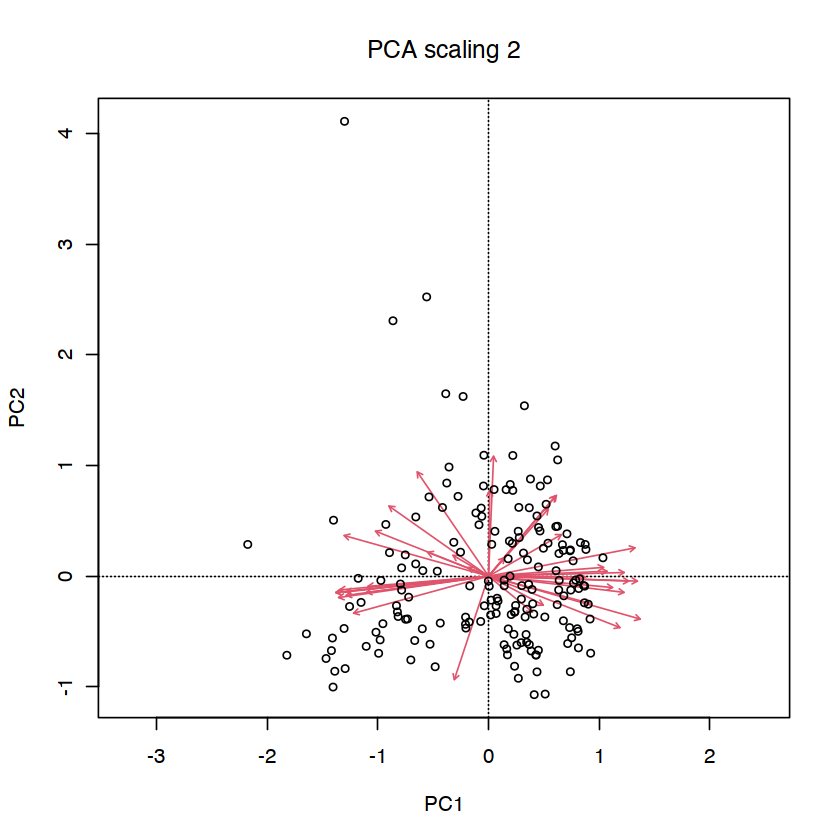

In [48]:
biplot(health_pca, scaling = 1, main = "PCA scaling 1", choices = c(1, 2))
biplot(health_pca, scaling = 2, main = "PCA scaling 2", choices = c(1, 2))

Assemble the ordination plot using the **vegan** component functions:

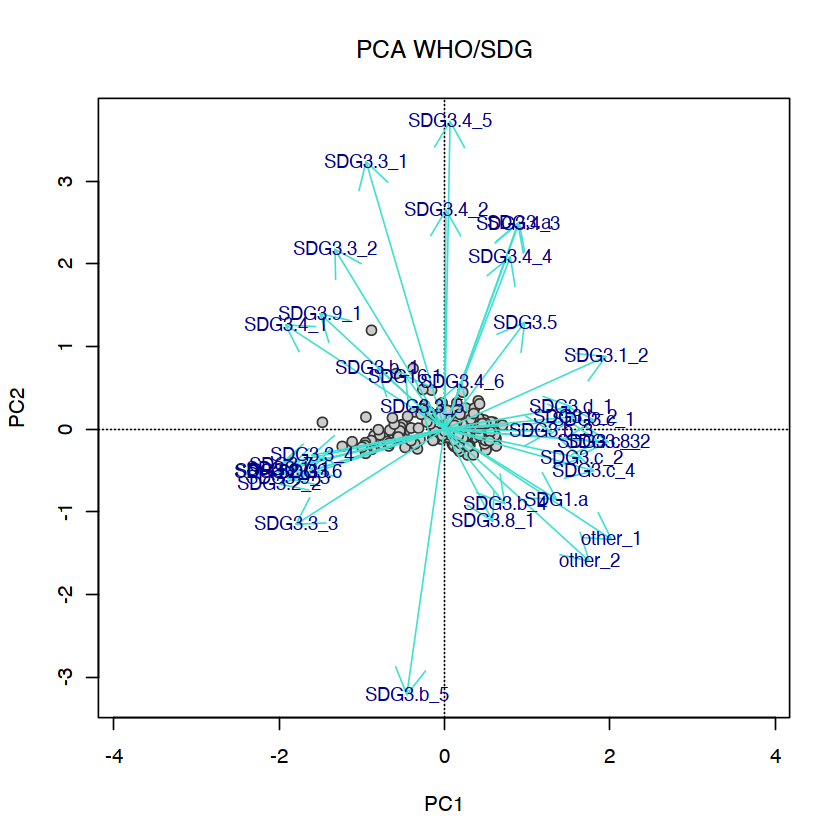

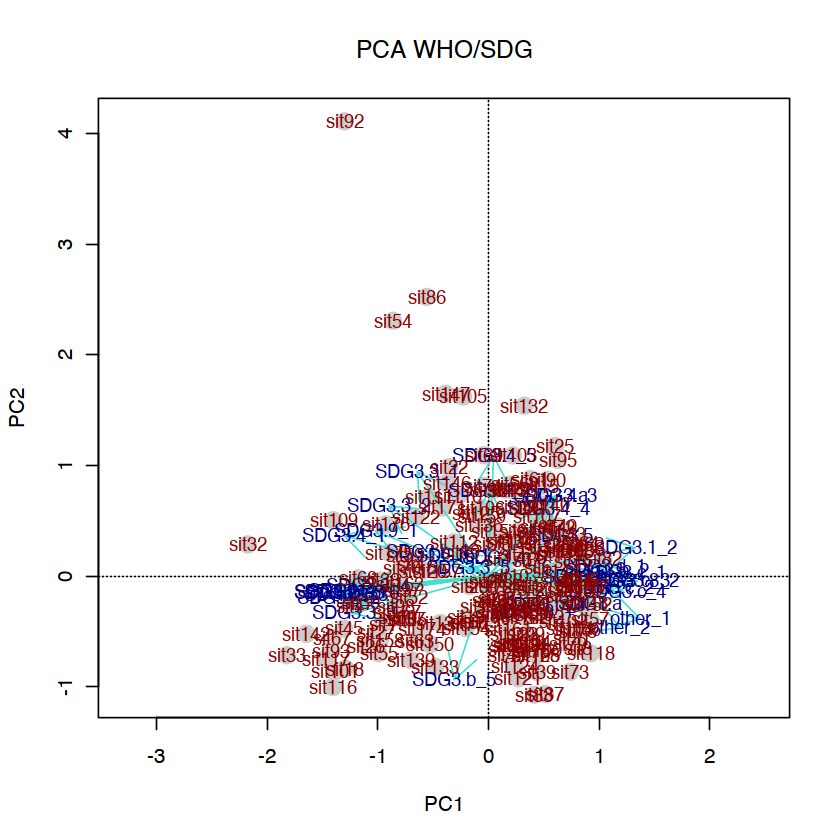

In [49]:
pl1 <- ordiplot(health_pca, type = "none", scaling = 1, main = "PCA WHO/SDG")
points(pl1, "sites", pch = 21, cex = 1.0, col = "grey20", bg = "grey80")
points(pl1, "species", pch = 21, col = "turquoise", arrows = TRUE)
text(pl1, "species", col = "blue4", cex = 0.9)
# text(pl1, "sites", col = "red4", cex = 0.9)

pl2 <- ordiplot(health_pca, type = "none", scaling = 2, main = "PCA WHO/SDG")
points(pl2, "sites", pch = 21, cex = 1.75, col = "grey80", bg = "grey80")
points(pl2, "species", pch = 21, col = "turquoise", arrows = TRUE)
text(pl2, "species", col = "blue4", cex = 0.9)
text(pl2, "sites", col = "red4", cex = 0.9)

Yet another way to make an ordination plot. Notice how I use `ggplot()` to assemble the figure from pre-assembled dataframes containing the species (SDGs) and site (countries) scores. In the respecitve dataframes I also include appropriate labels that can be used to colour-code the ParentLocation (major groupings of countries).

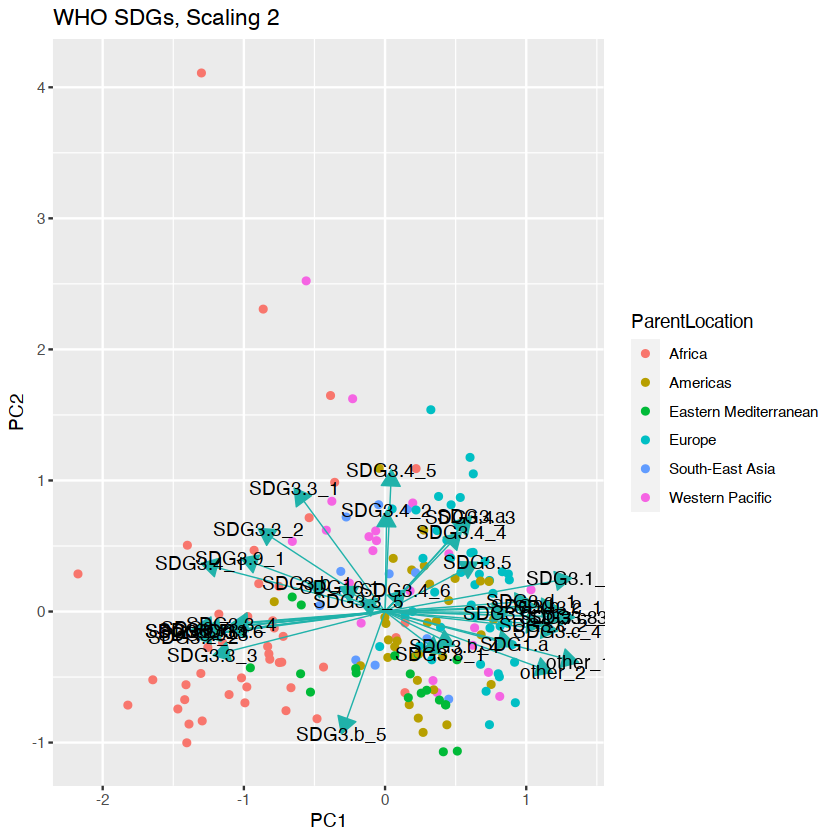

In [51]:
site_scores <- tibble(ParentLocation = health_wide$ParentLocation,
                      Location = health_wide$Location)
site_scores <- tibble(cbind(site_scores, scores(health_pca, display = "sites", choices = c(1:7))))
species_scores <- data.frame(scores(health_pca, display = "species", choices = c(1:7)))
species_scores$species <- rownames(species_scores)
species_scores <- tibble(species_scores)

ggplot(data = site_scores, aes(x = PC1, y = PC2)) +
  geom_point(aes(col = ParentLocation)) +
  geom_segment(data = species_scores, 
               aes(x = 0, y = 0, xend = PC1, yend = PC2),
               arrow = arrow(length = unit(0.4, "cm"), type = "closed"), 
               color = "lightseagreen", alpha = 1, size = 0.3) +
  geom_text(data = species_scores, 
            aes(x = PC1, y = PC2, label = species),
            color = "black") +
  xlab("PC1") + ylab("PC2") + 
  ggtitle("WHO SDGs, Scaling 2")

There seems to be separate groups of colours (ParentLocation). Certain countries come out together in this ordination. This analysis will benefit from a cluster analyses of some kind.

### Questions

1. Explain the code section-by-section in long-form text. Include also te reasoning for implementing each section.
2. Discuss and explain the patterns observed.

<span style="color:red">Submit an R script wherein you provide answers to these questions by no later than 17:00 on Friday 23 July 2021.</span>

## References

Graham, M. H. (2003). Confronting multicollinearity in ecological multiple regression. Ecology 84, 2809–2815.